### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
coupon_data = pd.read_csv('data/coupons.csv')

In [3]:
pd.set_option('display.max_columns', None)
coupon_data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Checking column info
coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Lets check the shape of the Dataframe
coupon_data.shape

(12684, 26)

In [6]:
# Lets check how many null values are present for each column
coupon_data.isnull().sum().to_frame().reset_index().rename(columns={"index":"columns", 0:"values"}).sort_values("values",ascending=False)

,columns,values
14,car,12576
16,CoffeeHouse,217
19,Restaurant20To50,189
17,CarryAway,151
18,RestaurantLessThan20,130
15,Bar,107
0,destination,0
1,passanger,0
24,direction_opp,0
23,direction_same,0


In [7]:
#lets look at the above data with respect to percentage NAN rows
coupon_data.isnull().sum().sort_values(ascending=False) * 100 /coupon_data.shape[0]

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

* Looking at the above output we can drop the car column as it has ~99% of values as NAN , we can just drop it as it is having insuffiecient data for any analysis.
* Also looking at other columns having NAN values, and their NAN values are ~1% we can even drop those columns as loosing this infomation will not have greter impact on the dataset. 
* We can also look at the duplicate data and drop the duplicate rows


In [8]:
# droping car column
coupon_data = coupon_data.drop(columns=['car'])

In [9]:
# dropping all other rows which has NAN in any of its column
coupon_data.dropna(inplace=True)
coupon_data.shape

(12079, 25)

In [10]:
# dropping duplicates also creating new dataframe just in case if we have to revisit old dataframe values
df = coupon_data.drop_duplicates()
df.shape

(12007, 25)

4. What proportion of the total observations chose to accept the coupon? 



To answer the above question, lets check the counts of the column 'Y' on its distinct values 1 or 0 and compare that with the number of rows of the data which will give us the percentage of accpeted and declined coupon

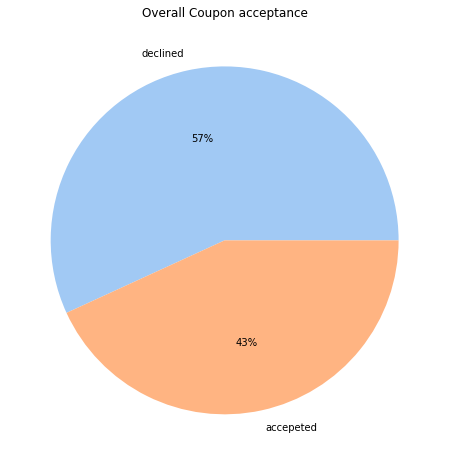

<Figure size 432x288 with 0 Axes>

In [158]:
# plotting 
accpeted_coupon_df = (df['Y'].value_counts()/df.shape[0] * 100 ).reset_index() 

# Using lables to transalte 0 = decline and 1 = Accpeted
labels = ['declined','accepeted']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
# create pie chart
plt.figure(figsize=(18,8))
plt.pie(accpeted_coupon_df['Y'].to_list(), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Overall Coupon acceptance')
plt.show()
plt.savefig('images/Overall_Coupon_acceptance.png')

Looking at the above visulaization we can see that only 43% of the drivers have accepted any type coupons irrespective of any condition 

5. Use a bar plot to visualize the `coupon` column.

To visualize the coupon column lets plot a count plot of different type of coupons on x axis to the counts of the accpted and declined coupons by the drivers on Y axis

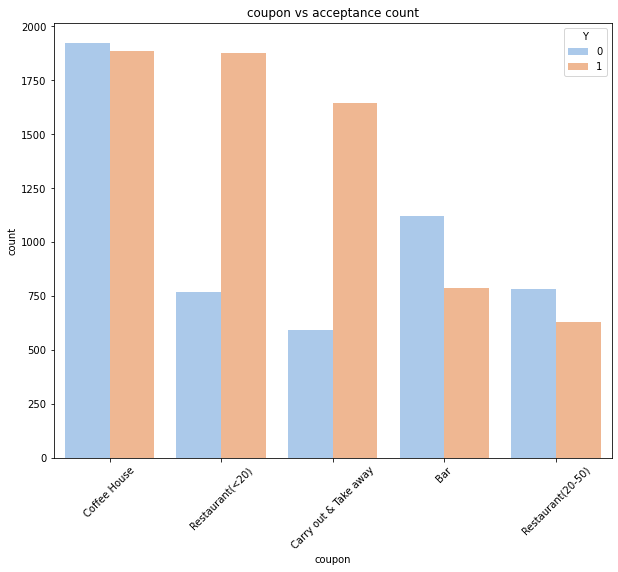

<Figure size 432x288 with 0 Axes>

In [159]:
# plotting 
plt.figure(figsize=(10,8))
sns.countplot(x='coupon',hue='Y',data=df, order=df.query('Y==1')["coupon"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.title(f"coupon vs acceptance count")
plt.show()
plt.savefig('images/Coupon_category_acceptance.png')

Looking at the above visualization we can see that most drivers preffers coffee house coupons even though its declination rate is also higher,  followed by cheap restaurants coupons "Restaurant(<20)" are accteped by the drivers.

6. Use a histogram to visualize the temperature column.

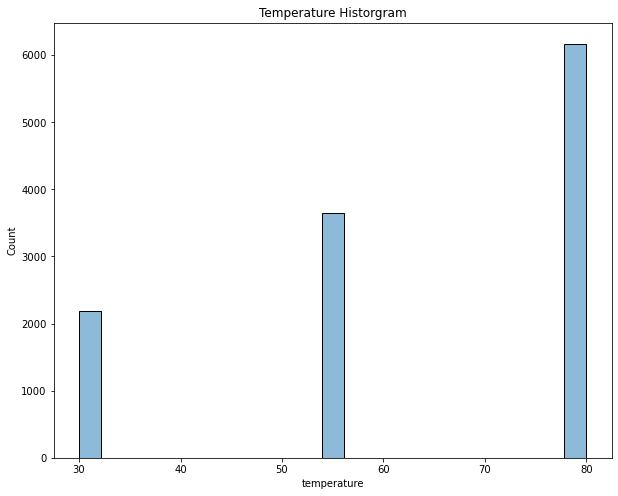

In [160]:
# plotting 
plt.figure(figsize=(10,8))
sns.histplot(data=df["temperature"], palette="pastel",alpha=0.5)
plt.title("Temperature Historgram")
plt.savefig('images/Temperature_Historgram.png')

We see that most of the data is skewed towards temperature 80F. The data is collected for mostly the sunny weather. We might need to collect more data for other weather conditions to propely predict the drivers behaviour for different type of coupon acceptance.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
# filtering the data on coupon column for value 'Bar'
df_bar_coupons = df.query('coupon == "Bar"')
df_bar_coupons.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
963,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Married partner,0,Bachelors degree,Architecture & Engineering,$75000 - $87499,less1,less1,1~3,4~8,less1,1,1,1,0,1,0
12610,Work,Alone,Snowy,30,7AM,Bar,1d,Female,50plus,Divorced,1,Some college - no degree,Personal Care & Service,$12500 - $24999,never,less1,1~3,1~3,less1,1,1,1,0,1,0
8303,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,26,Married partner,0,Graduate degree (Masters or Doctorate),Architecture & Engineering,$100000 or More,1~3,1~3,1~3,4~8,4~8,1,1,0,0,1,1
12131,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,21,Unmarried partner,0,Bachelors degree,Unemployed,$25000 - $37499,never,never,1~3,1~3,less1,1,1,0,0,1,0
12459,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,41,Divorced,1,High School Graduate,Sales & Related,$12500 - $24999,never,less1,less1,1~3,4~8,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


To answer the above question lets try plotting a pie chart which shows the accpetance percentage

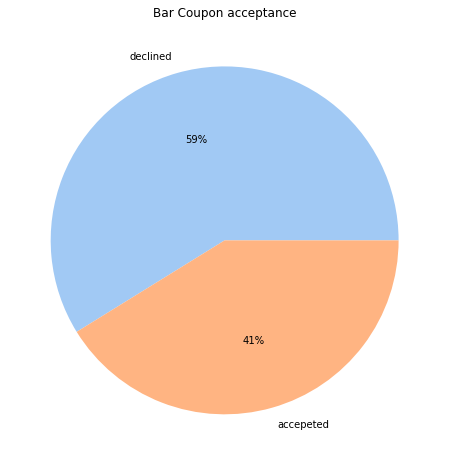

<Figure size 432x288 with 0 Axes>

In [161]:
# plotting 
accpeted_coupon_df = (df_bar_coupons['Y'].value_counts()/df_bar_coupons.shape[0] * 100).reset_index()

# Using lables to transalte 0 = decline and 1 = Accpeted
labels = ['declined','accepeted']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(accpeted_coupon_df['Y'].to_list(), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Bar Coupon acceptance')
plt.show()
plt.savefig('images/Bar_Coupon_acceptance.png')

Looking at te above visualization we can see that 41% of the drives offered bar coupon accted the same.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


['never' 'less1' '1~3' 'gt8' '4~8']


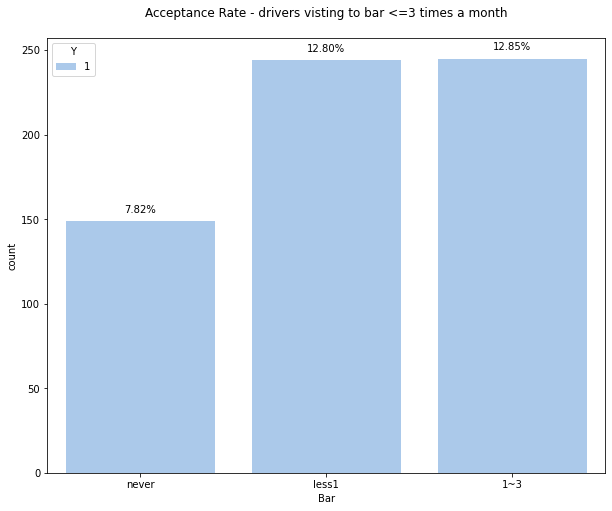

In [162]:
print(df_bar_coupons.Bar.unique()) # checking the unique values in our datset for Bar column
plt.figure(figsize=(10,8))
ax=sns.countplot(palette="pastel", 
            data=df_bar_coupons.query('Bar in ("never","less1","1~3") and Y==1'),
            x='Bar', hue='Y')
total = float(len(df_bar_coupons["Y"]))

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers visting to bar <=3 times a month
""")
plt.savefig('images/Acceptance_Rate_1.png')

Looking at the above visualization we can see that drivers going to bar between 1to 3 times a months accpeted the bar coupons the most followed by drivers going less than once every month. Interestingly drivers who never visted bar in a month also showed the acceptence rate of 7.82%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


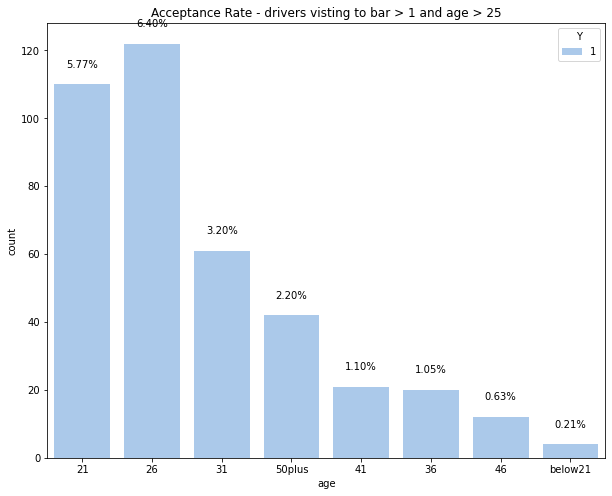

In [163]:
# df_bar_coupons.query('Bar not in("never","less1")')[['Y','age']]
plt.figure(figsize=(10,8))
ax=sns.countplot(palette="pastel",data=df_bar_coupons.query('Bar not in("never","less1") & Y==1')[['Y','age']],x='age',hue='Y')

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"Acceptance Rate - drivers visting to bar > 1 and age > 25")
plt.savefig('images/Acceptance_Rate_2.png')

From the above visualization we can see that the drivers with age group 26 and who are use to visit Bar atleast once a month are the drivers who accpeted the most bar coupons offered to them. the acceptance rate is 6.40% of the total coupons followed b by age group 21 and then 31 age group years.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


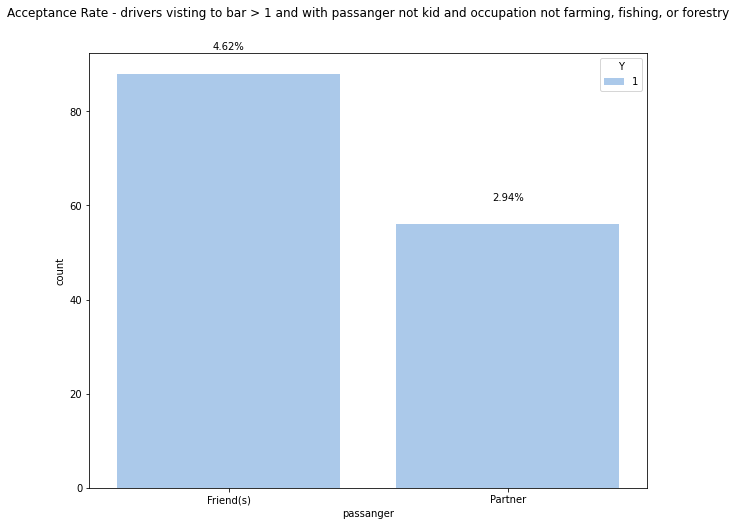

In [164]:
# print(df_bar_coupons.passanger.unique())
plt.figure(figsize=(10,8))
ax=sns.countplot(palette="pastel", data=df_bar_coupons.query('Bar in("never","less1") & occupation != "Farming Fishing & Forestry" & passanger not in ("Alone", "Kid(s)") & Y==1')[['passanger','Y']],x='passanger', hue='Y')

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers visting to bar > 1 and with passanger not kid and occupation not farming, fishing, or forestry

""")
plt.savefig('images/Acceptance_Rate_3.png')

Looking at above visualization we say that drivers with freinds tend to accpet more bar coupens than with partners who are not in farming fishery or forestry occupation

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



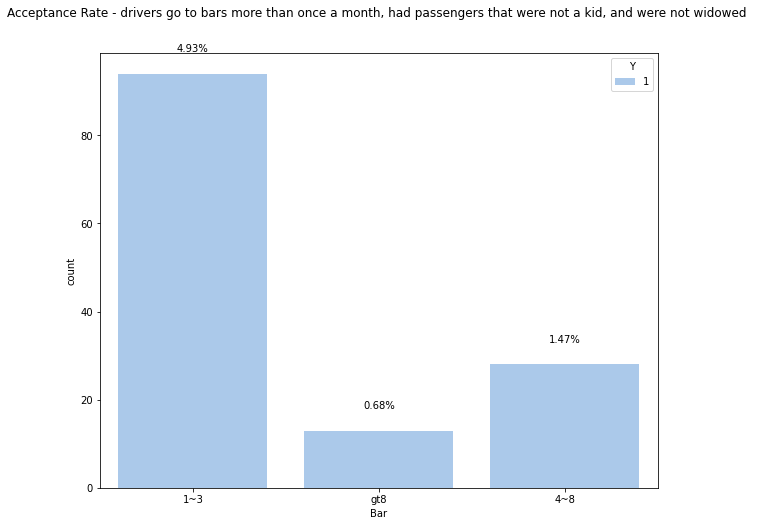

In [165]:
# plotting 
# go to bars more than once a month, had passengers that were not a kid, and were not widowed 
derived_df = df_bar_coupons.query('(Bar not in("never","less1") & passanger not in ("Alone","Kid(s)") & maritalStatus != "Widowed") & Y==1')                                                                
plt.figure(figsize=(10,8))
ax=sns.countplot(palette="pastel", data=derived_df,x='Bar', hue='Y')

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed 

""")
plt.savefig('images/Acceptance_Rate_4.png')

Looking at the above visulization we can say that drivers visting bar 1to 3 times a months who were travelling wit passnagers who were not kid and not windowed accpeted the bar coupon the most (4.93%) compared to others. 

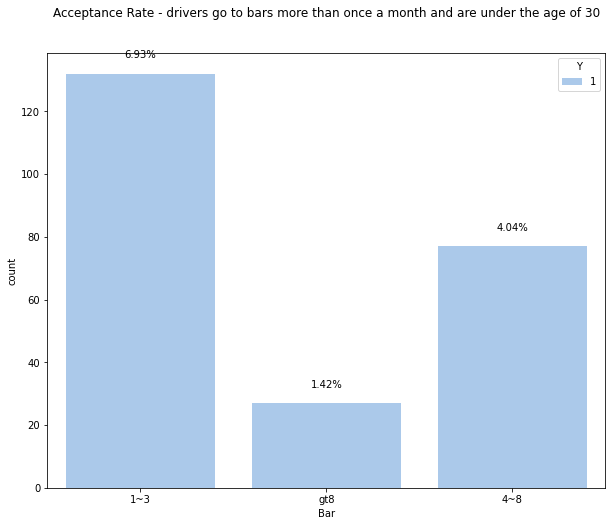

In [166]:
# plotting 
# go to bars more than once a month and are under the age of 30
derived_df = df_bar_coupons.query('(Bar not in("never","less1") & age in ("below21","21","26")) & Y==1')
plt.figure(figsize=(10,8))
ax=sns.countplot(palette="pastel", data=derived_df,x='Bar', hue='Y')

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers go to bars more than once a month and are under the age of 30

""")
plt.savefig('images/Acceptance_Rate_5.png')

Looking athe above visualization again we can see the drivers vsiting bar 1 to 3 tuimes a month accpeted the coupon the most ()6.93%

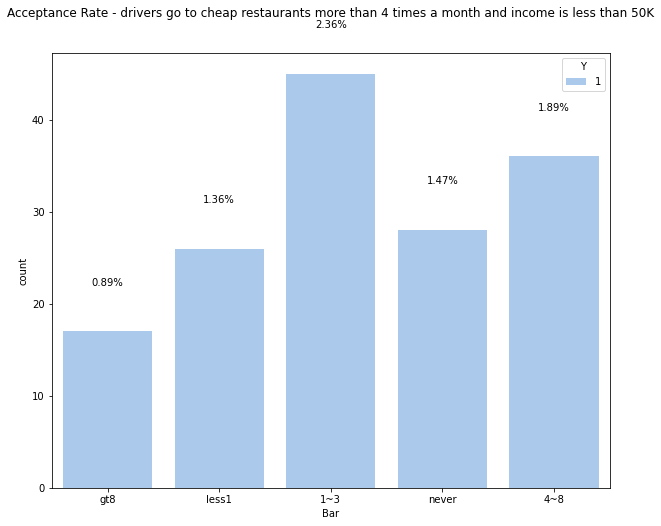

In [167]:
# plotting 
# go to cheap restaurants more than 4 times a month and income is less than 50K
derived_df = df_bar_coupons.query('(RestaurantLessThan20 in ("gt8","4~8")) & income in ("Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999") & Y==1')
plt.figure(figsize=(10,8))
ax=sns.countplot(palette="pastel", data=derived_df,x='Bar', hue='Y')

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers go to cheap restaurants more than 4 times a month and income is less than 50K

""")
plt.savefig('images/Acceptance_Rate_6.png')

Loonk at the above visualization we can see that for this new query criteria too to the drivers visting bars 1 to 3 times a month accpeted the coupon the most.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Based on the visualizations above, the following hypotheses can be concluded:**

- **Acceptance of bar coupons:** 41% of the bar coupons were accepted by drivers.
- **Frequency of bar visits:** Among different groups of drivers based on bar visit frequency, drivers who visit bars - 1 to 3 times a month accepted the highest number of bar coupons.
- **Age group:** Drivers in the age group around 26 years were the most likely to accept bar coupons.
- **Influence of companions:** Drivers who were accompanied by friends were more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Lets do a similar analysis on CoffeeHouse coupons

In [98]:
# Creating a dataframe for coffee house coupons
cofee_house_df = df.query('coupon == "Coffee House"')
cofee_house_df.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12258,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,50plus,Married partner,1,Some college - no degree,Business & Financial,$100000 or More,less1,1~3,4~8,1~3,1~3,1,0,0,1,0,1
11836,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,50plus,Widowed,1,Associates degree,Healthcare Support,$12500 - $24999,less1,less1,4~8,1~3,less1,1,1,0,0,1,1
2033,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Married partner,1,Some college - no degree,Management,$25000 - $37499,less1,1~3,1~3,4~8,1~3,1,1,0,0,1,1
6659,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,26,Unmarried partner,1,Some college - no degree,Transportation & Material Moving,$12500 - $24999,1~3,4~8,1~3,4~8,less1,1,1,0,1,0,0
1634,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Married partner,1,Some college - no degree,Unemployed,$37500 - $49999,1~3,4~8,1~3,4~8,less1,1,0,0,0,1,1


#### Lets see who accepts the Cofee House coupons with respect to gender, age and maritial status ####

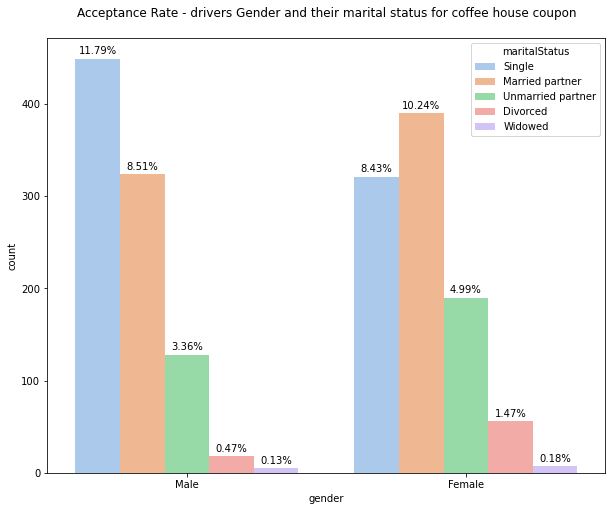

In [172]:
plt.figure(figsize=(10,8))
ax = sns.countplot(palette="pastel", data = cofee_house_df.query('Y==1'),x="gender",hue='maritalStatus')
total = float(len(cofee_house_df["Y"]))

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers Gender and their marital status for coffee house coupon
""")
plt.savefig('images/Acceptance_Rate_CofeeHouse_1.png')

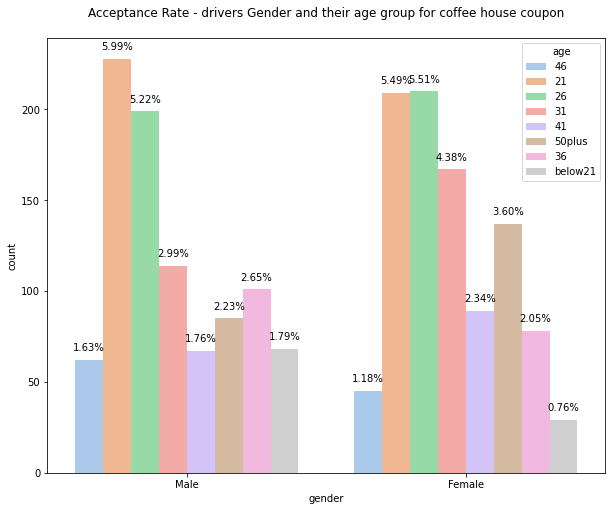

In [173]:
plt.figure(figsize=(10,8))
ax = sns.countplot(palette="pastel", data = cofee_house_df.query('Y==1'),x="gender",hue='age')
total = float(len(cofee_house_df["Y"]))

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers Gender and their age group for coffee house coupon
""")
plt.savefig('images/Acceptance_Rate_CofeeHouse_2.png')

#### Lets see the accepetance rate of cofee lovers wrt temperature

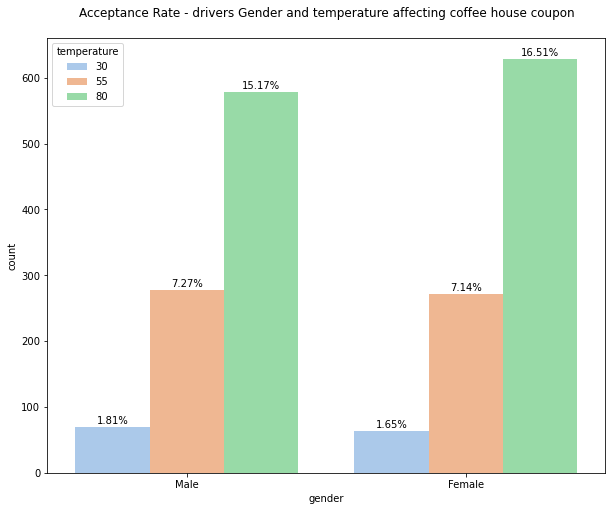

In [174]:
plt.figure(figsize=(10,8))
ax = sns.countplot(palette="pastel", data = cofee_house_df.query('Y==1'),x="gender",hue='temperature')
total = float(len(cofee_house_df["Y"]))

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers Gender and temperature affecting coffee house coupon
""")
plt.savefig('images/Acceptance_Rate_CofeeHouse_3.png')

We can see from above visualization that the drivers irrespective of the gender accpets coffee coupons even though the temperature is around 80F. This may be due to the data is over all skewed on tenperature 80 as per our earlier temerature histogram. So this analysis is of no relevance so lets ignore this.

#### Lets look at the accepetance rate of the drivers when the cofee house is on their way 

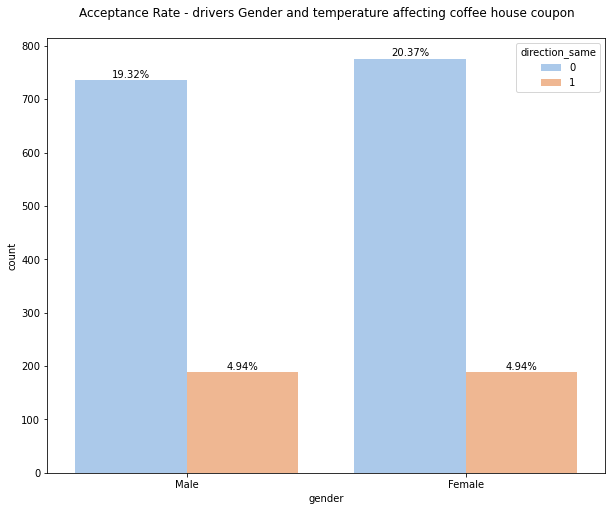

In [175]:
plt.figure(figsize=(10,8))
ax = sns.countplot(palette="pastel", data = cofee_house_df.query('Y==1'),x="gender",hue='direction_same')
total = float(len(cofee_house_df["Y"]))

# calculating and adding percentages to each bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + 5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
plt.title(f"""Acceptance Rate - drivers Gender and temperature affecting coffee house coupon
""")
plt.savefig('images/Acceptance_Rate_CofeeHouse_4.png')

We see that cofee house on the same direction of their destination does not have greater accptenace rate for any gender also as compared to declines acceptance is low.

#### Lets do similar analysis on Coffee house coupon acceptance on some other feild and conclude our hypothysis

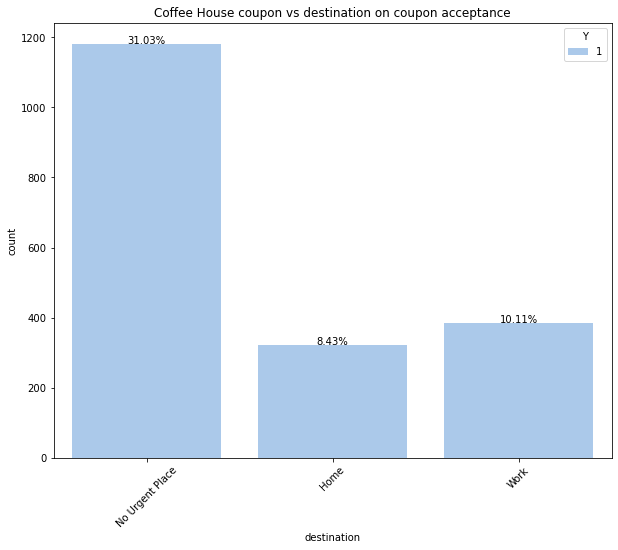

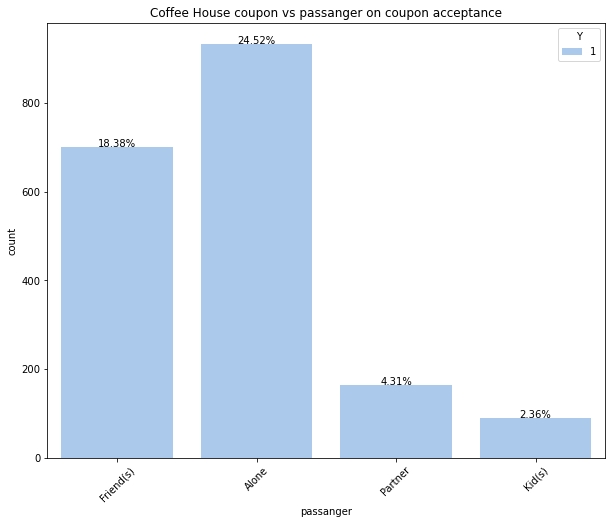

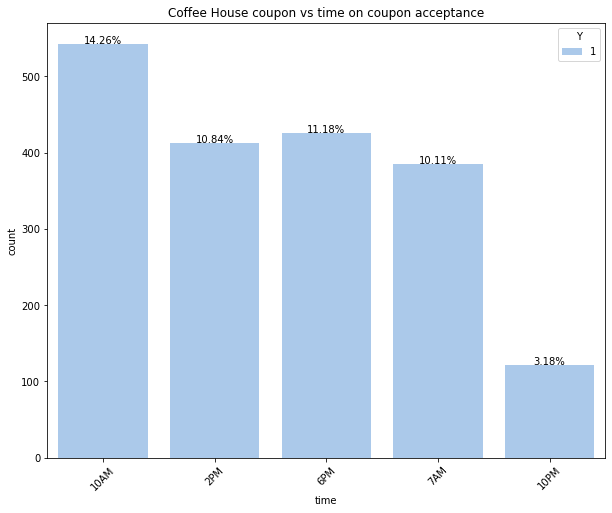

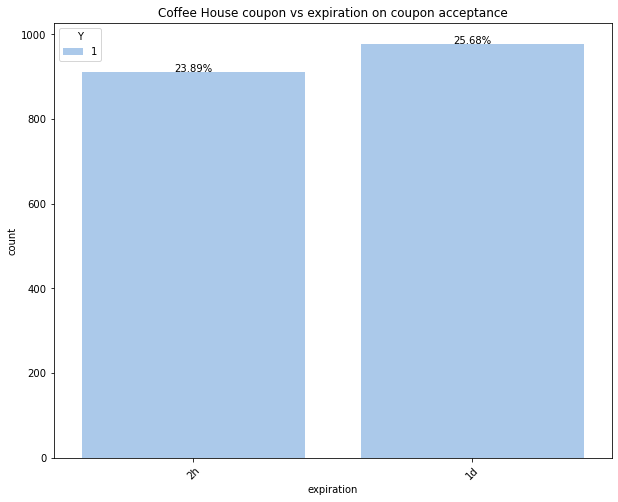

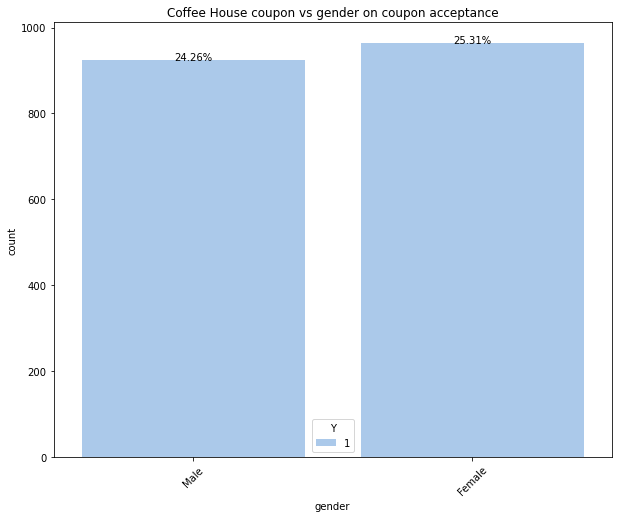

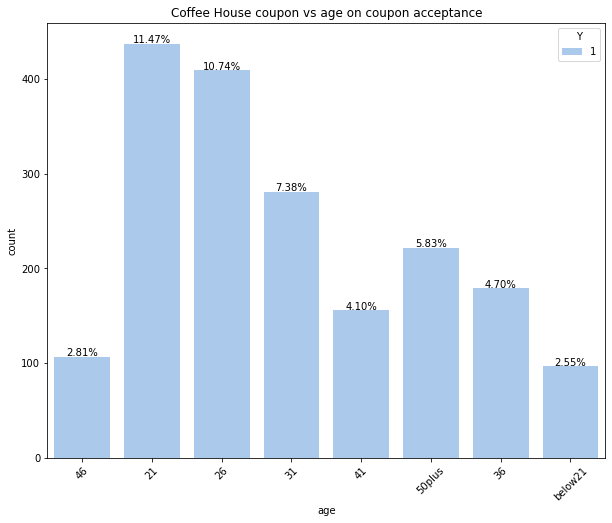

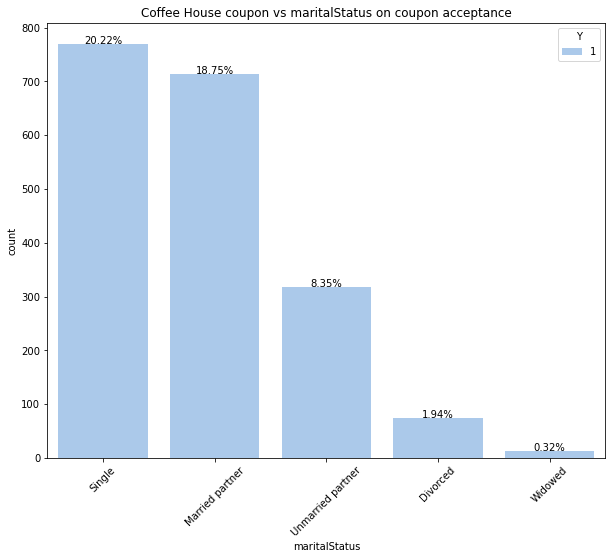

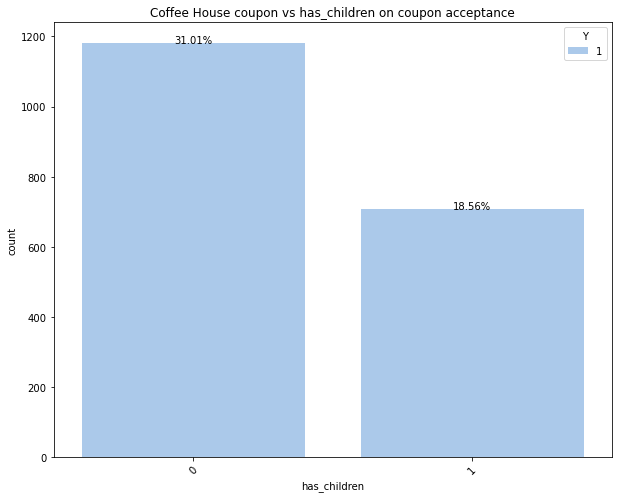

In [176]:
n=5
for col in cofee_house_df.drop(['Y','CoffeeHouse','temperature','weather','occupation','education',"Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50","toCoupon_GEQ5min","toCoupon_GEQ15min","toCoupon_GEQ25min","direction_same","direction_opp","income","coupon"], axis = 1).columns:
    plt.figure(figsize=(10,8))
    total = float(len(cofee_house_df["Y"]) )
    ax = sns.countplot(x=col, hue="Y", data=cofee_house_df.query('Y==1'), palette="pastel")
    plt.xticks(rotation=45)
    
# calculating and adding percentages to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
              height + .5,
              '{:1.2f}%'.format((height/total)*100),
              ha="center") 
    plt.title(f"Coffee House coupon vs {col} on coupon acceptance")
    plt.savefig(f'images/Acceptance_Rate_CofeeHouse_{n}.png')
    n = n + 1


**Based on our visualizations and findings on Coffee house coupons, the following hypotheses have been identified:**

- Gender-based analysis:
    - Single male drivers tend to accept coffee coupons more than females.
    - Married female drivers accept more coffee coupons.
    - Male drivers in the age group of 21, and female drivers in the age group of 26, tend to accept more coffee coupons.

- General analysis on drivers who accept coffee house coupons:
    - Drivers heading to non-urgent places followed by drivers going to the office are more likely to accept coffee coupons.
    - Solo drivers followed by drivers traveling with friends are more likely to accept coffee coupons.
    - The most popular time slots for accepting coffee coupons are around 10 am follwed by 6 pm.
    - Coupons with a one-day expiration period are more accepted than short-lived coupons.
    - Females drivers are more likely to accept coffee coupons.
    - Drivers age group of 21 shows a higher tendency towards coffee, followed by the age group of 26 compared to other age groups.
    - Single drivers accept more coffee coupons.
    - Drivers with no kids also show interest in accepting coffee house coupons.